# Importações e leitura do dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv('churn.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Análise Exploratória

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Análise da variável Senior Citizen

In [6]:
df['SeniorCitizen'].unique()

array([0, 1])

### Análise da variável tenure

In [7]:
df['tenure'].value_counts()

,count
tenure,
1,613
72,362
2,238
3,200
4,176
...,...
28,57
39,56
44,51


### Análise da variável TotalCharges

In [8]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
df['MonthlyCharges'].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

Descobrimos que a variável Total Charges está com os valores em string, quando eram para ser numéricos.

### Verificação de dados nulos

In [10]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


### Verificação de duplicatas

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


# Processamento dos dados

### Remoção de colunas

In [13]:
df = df.drop(['customerID'], axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Transformação de variáveis

In [15]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [17]:
cat_cols = [
    "gender", "Partner", "Dependents", "PhoneService", "MultipleLines",
    "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies", "Contract",
    "PaperlessBilling", "PaymentMethod"
]

### Aplicar One Hot Encoding

In [18]:
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [19]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   Churn                                  7043 non-null   object 
 5   gender_Male                            7043 non-null   bool   
 6   Partner_Yes                            7043 non-null   bool   
 7   Dependents_Yes                         7043 non-null   bool   
 8   PhoneService_Yes                       7043 non-null   bool   
 9   MultipleLines_No phone service         7043 non-null   bool   
 10  MultipleLines_Yes                      7043 non-null   bool   
 11  Inte

In [20]:
df_encoded['Churn'] = df_encoded['Churn'].map({'Yes': 1, 'No': 0})

In [21]:
df_encoded['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


In [22]:
df = df_encoded

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   Churn                                  7043 non-null   int64  
 5   gender_Male                            7043 non-null   bool   
 6   Partner_Yes                            7043 non-null   bool   
 7   Dependents_Yes                         7043 non-null   bool   
 8   PhoneService_Yes                       7043 non-null   bool   
 9   MultipleLines_No phone service         7043 non-null   bool   
 10  MultipleLines_Yes                      7043 non-null   bool   
 11  Inte

In [24]:
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,True,True,True,True,False,True,False,False,False,True,False,False,False,True,False,True,False,True,False,True,True,False,True,False,False,True
7039,0,72,103.20,7362.90,0,False,True,True,True,False,True,True,False,False,False,False,True,False,True,False,False,False,True,False,True,True,False,True,True,False,False
7040,0,11,29.60,346.45,0,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
7041,1,4,74.40,306.60,1,True,True,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True


# ---------------**Random Forest**-------------------

## 1. Definição das variáveis

In [25]:
X = df.drop('Churn', axis=1)
y = df['Churn']

## 2. Separar em treino e teste

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 3. Escolha e definição do modelo

In [27]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

## 4. Treinamento do modelo

In [28]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 5. Previsões

In [29]:
y_pred = model_rf.predict(X_test)
y_pred_proba = model_rf.predict_proba(X_test)[:, 1]

### 6. Avaliações

In [30]:
classification = classification_report(y_test, y_pred)
print(classification)

              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1036
           1       0.65      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



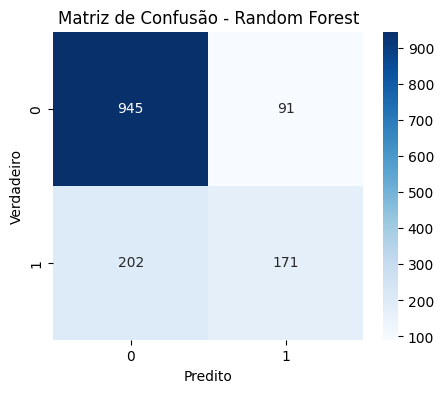

In [31]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Predito"); plt.ylabel("Verdadeiro")
plt.show()

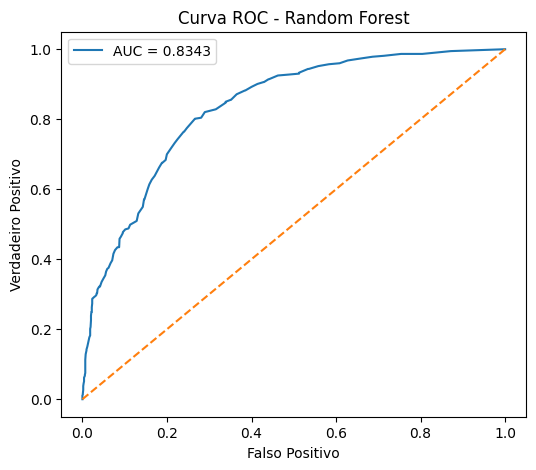

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0,1],[0,1], linestyle="--")
plt.xlabel("Falso Positivo")
plt.ylabel("Verdadeiro Positivo")
plt.title("Curva ROC - Random Forest")
plt.legend()
plt.show()

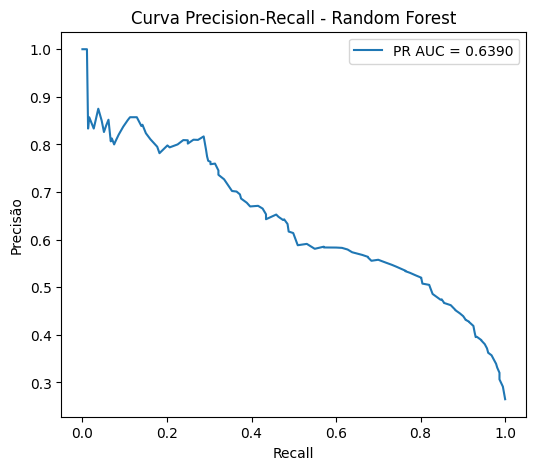

In [33]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, label=f"PR AUC = {pr_auc:.4f}")
plt.xlabel("Recall")
plt.ylabel("Precisão")
plt.title("Curva Precision-Recall - Random Forest")
plt.legend()
plt.show()

# ---------- Light GBM -------------

## 1. Definição e escolha do modelo

In [34]:
model_lgbm = LGBMClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=-1,
    random_state=42)

## 2. Treinamento

In [35]:
model_lgbm.fit(X_train, y_train)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000965 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265531 -> initscore=-1.017418
[LightGBM] [Info] Start training from score -1.017418


LGBMClassifier(learning_rate=0.05, random_state=42)

## 3. Previsões

In [36]:
y_pred_lgbm = model_lgbm.predict(X_test)
y_proba_lgbm = model_lgbm.predict_proba(X_test)[:, 1]

##  4. Avaliações

In [37]:
print("Classification Report - LightGBM")
print(classification_report(y_test, y_pred_lgbm))

Classification Report - LightGBM
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.53      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



# ------- XGBoost ---------

In [38]:
model_xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=6,
    random_state=42)

In [39]:
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [40]:
y_pred_xgb = model_xgb.predict(X_test)
y_proba_xgb = model_xgb.predict_proba(X_test)[:, 1]

In [41]:
print("Classification Report - XGBoost")
print(classification_report(y_test, y_pred_xgb))

Classification Report - XGBoost
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



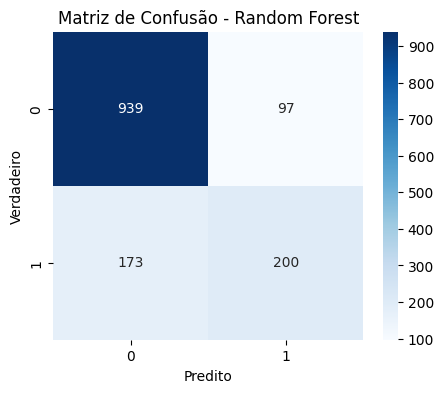

In [42]:
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Predito"); plt.ylabel("Verdadeiro")
plt.show()

Hiperparâmetros RF
<br><br>


    n_estimators=300, #quantidade de árvores na floresta

    criterion="gini",
    
    max_depth=8,
    
    min_samples_split=10,
    
    min_samples_leaf=4,
    
    max_features="sqrt",
    
    bootstrap=True, #se vai utilizar amostragem bootstrap
    
    oob_score=True, #validação out of bag
    
    class_weight="balanced",
    
    n_jobs=-1, #número de CPUs para paralelizar
    
    random_state=42


✔️ n_jobs=1

Usa apenas 1 CPU → mais lento.

✔️ n_jobs=4

Usa 4 núcleos → treina várias árvores simultaneamente.

✔️ n_jobs=-1

Usa todos os núcleos disponíveis da máquina.

Hiperparâmetros XGBoost


    "max_depth": [3, 5, 7, 10],
    
    "min_child_weight": [1, 3, 5, 7],
    
    "gamma": [0, 0.1, 0.2, 0.5],
    
    "subsample": [0.6, 0.8, 1.0],
    
    "colsample_bytree": [0.6, 0.8, 1.0],
    
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    
    "n_estimators": [200, 500, 1000],
    
    "reg_alpha": [0, 0.1, 1],
    
    "reg_lambda": [1, 5, 10]



A) Controle do modelo (estrutura das árvores)

🌳 max_depth

Profundidade máxima da árvore.
Valores típicos: 3 a 10

🌿 min_child_weight

Controle de overfitting (similar ao min_samples_leaf).
Valores comuns: 1, 3, 5, 7

🌾 gamma

Ganho mínimo para fazer um split.
Quanto maior, mais conservador.
Valores: 0, 0.1, 0.2, 0.5, 1

🌱 subsample

Porcentagem das amostras usadas em cada árvore.
Valores: 0.5 a 1.0

🍃 colsample_bytree

% de features usadas em cada árvore.
Valores: 0.3 a 1.0
<br><br>
B) Regularização – evita overfitting

🔒 reg_lambda (L2)

Padrão = 1.
Testar: 0.1, 1, 5, 10

🔑 reg_alpha (L1)

Força sparsity, útil em datasets com muitas colunas.
Valores: 0, 0.1, 1, 5
<br><br>
C) Taxa de aprendizado

⚡ learning_rate

Quanto o modelo aprende por iteração.
Valores típicos:

0.01 – 0.3

Menor → melhor generalização, mas precisa de mais árvores.
<br><br>
D) Número de árvores

🌲 n_estimators

100 a 2000, dependendo do learning_rate.
<br><br>
E) Booster

🔥 booster

"gbtree" (o mais usado)

"gblinear"

"dart" (dropout nas árvores)
<br><br>
F) Outros importantes

⚙️ scale_pos_weight

Balanceia classes desbalanceadas.
Regra prática → negativos/positivos

# Otimização de hiperparâmetros

In [43]:
!pip install optuna

In [44]:
!pip install ray

In [51]:
import optuna
import ray
from ray import tune
from ray.tune.search.optuna import OptunaSearch
from ray.tune.schedulers import ASHAScheduler
from sklearn.model_selection import RandomizedSearchCV

## Funções para facilitar a comparação de tunings

### Avaliação

In [46]:
def avaliar_modelo(model, X_test, y_test, nome_modelo):
    y_pred = model.predict(X_test)
    print(f"\n=== Classification Report - {nome_modelo} ===")
    print(classification_report(y_test, y_pred))

### Random Search

In [52]:
def rodar_random_search(X_train, y_train, X_test, y_test, n_iter=20):

    param_dist = {
        "n_estimators": [100, 200, 300, 500],
        "max_depth": [3, 4, 5, 6, 8, 10],
        "learning_rate": np.linspace(0.01, 0.3, 10),
        "subsample": np.linspace(0.6, 1.0, 5),
        "colsample_bytree": np.linspace(0.5, 1.0, 5),
        "gamma": np.linspace(0, 5, 6)
    }

    model = XGBClassifier(
        random_state=42,
        tree_method="hist",
        eval_metric="logloss"
    )

    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_dist,
        n_iter=n_iter,
        scoring="f1",
        cv=3,
        verbose=1,
        n_jobs=-1,
        random_state=42
    )

    random_search.fit(X_train, y_train)

    best_model = random_search.best_estimator_
    avaliar_modelo(best_model, X_test, y_test, "Random Search")

    return best_model

### Optuna

In [47]:
def rodar_optuna(X_train, y_train, X_test, y_test, n_trials=20):

    def objective(trial):
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 100, 500),
            "max_depth": trial.suggest_int("max_depth", 3, 10),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
            "subsample": trial.suggest_float("subsample", 0.6, 1.0),
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
            "gamma": trial.suggest_float("gamma", 0, 5)
        }

        model = XGBClassifier(
            **params,
            random_state=42,
            tree_method="hist",
            eval_metric="logloss"
        )

        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        report = classification_report(y_test, preds, output_dict=True)

        return report["1"]["f1-score"]  # otimizando F1 da classe positiva

    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=n_trials)

    print("\nMelhores parâmetros Optuna:", study.best_params)

    best_params = study.best_params
    best_model = XGBClassifier(
        **best_params,
        random_state=42,
        tree_method="hist",
        eval_metric="logloss"
    )
    best_model.fit(X_train, y_train)

    avaliar_modelo(best_model, X_test, y_test, "Optuna")

    return best_model

# Testar otimizações

In [53]:
best_random = rodar_random_search(X_train, y_train, X_test, y_test)

Fitting 3 folds for each of 20 candidates, totalling 60 fits

=== Classification Report - Random Search ===
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.68      0.57      0.62       373

    accuracy                           0.81      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.81      0.81      1409



In [54]:
best_optuna = rodar_optuna(X_train, y_train, X_test, y_test)

[I 2025-12-06 20:35:46,055] A new study created in memory with name: no-name-b628cccf-b0cb-4f5b-895d-a54b9b683263
[I 2025-12-06 20:35:46,573] Trial 0 finished with value: 0.6183431952662722 and parameters: {'n_estimators': 305, 'max_depth': 9, 'learning_rate': 0.18544705157292832, 'subsample': 0.7525693902276264, 'colsample_bytree': 0.7557268871039637, 'gamma': 3.6490760751091447}. Best is trial 0 with value: 0.6183431952662722.
[I 2025-12-06 20:35:47,740] Trial 1 finished with value: 0.6128550074738416 and parameters: {'n_estimators': 487, 'max_depth': 6, 'learning_rate': 0.06898353473498854, 'subsample': 0.7210921474309707, 'colsample_bytree': 0.7249306428236639, 'gamma': 4.620062759942673}. Best is trial 0 with value: 0.6183431952662722.
[I 2025-12-06 20:35:48,036] Trial 2 finished with value: 0.6029850746268657 and parameters: {'n_estimators': 194, 'max_depth': 4, 'learning_rate': 0.11196417518487277, 'subsample': 0.9428982289079207, 'colsample_bytree': 0.5176147993754318, 'gamma':


Melhores parâmetros Optuna: {'n_estimators': 492, 'max_depth': 9, 'learning_rate': 0.19130433842537925, 'subsample': 0.7255704224306873, 'colsample_bytree': 0.7421465401217415, 'gamma': 4.999605995437034}

=== Classification Report - Optuna ===
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.70      0.57      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

